In [37]:
import geopandas as gp
from shapely.geometry import shape, Polygon
import pandas as pd
import sys
sys.path.append('..')

from matplotlib import pyplot as plt

countries_raw = gp.read_file("./tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
provinces_raw = gp.read_file("./tmp/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
rivers_raw = gp.read_file('./tmp/ne_10m_rivers_lake_centerlines_scale_rank/ne_10m_rivers_lake_centerlines_scale_rank.shp')
lakes_raw = gp.read_file('./tmp/ne_10m_lakes/ne_10m_lakes.shp')
urban_raw = gp.read_file('./tmp/ne_10m_urban_areas/ne_10m_urban_areas.shp')
populated_places_raw = gp.read_file('./tmp/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp')


In [38]:
bounding_box = (118,33,136,45)

countries = countries_raw.set_crs(epsg=4326)
provinces = provinces_raw.set_crs(epsg=4326)
rivers = rivers_raw.set_crs(epsg=4326)
urban = urban_raw.set_crs(epsg=4326)
lakes = lakes_raw.set_crs(epsg=4326)
populated_placed = populated_places_raw.set_crs(epsg=4326)

map_extent = gp.GeoDataFrame(
    data={"geometry": [
        Polygon([
            (bounding_box[0], bounding_box[1]),
            (bounding_box[2], bounding_box[1]),
            (bounding_box[2], bounding_box[3]),
            (bounding_box[0], bounding_box[3]),
		])
	]},
    geometry="geometry",
    crs='EPSG:4326'
)

map_extent.to_file("./tmp/north-korea-extent.geojson")

<Axes: title={'center': 'North Korea'}>

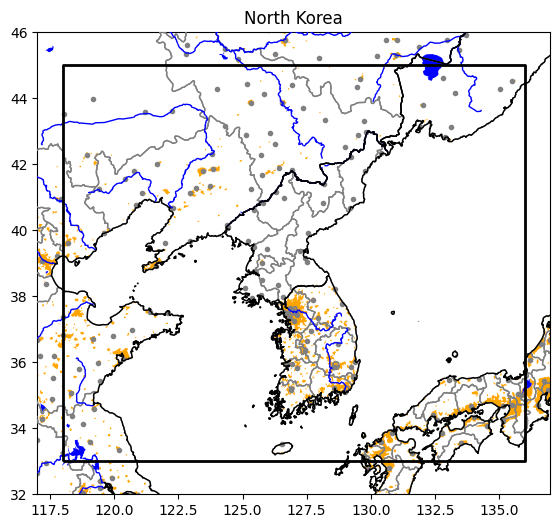

In [42]:
# Plot

fig, ax = plt.subplots(figsize=(7,6))
plt.title("North Korea")

ax.set_xlim(bounding_box[0] -1, bounding_box[2] + 1)
ax.set_ylim(bounding_box[1] -1, bounding_box[3] + 1)

countries.plot(ax=ax, color="none", edgecolor="black", zorder=10)
provinces.plot(ax=ax, color="none", edgecolor="gray", zorder=5)
urban.plot(ax=ax, color="orange")
rivers.plot(ax=ax, color='blue', lw=1, zorder=7)
lakes.plot(ax=ax, color="blue")
populated_placed.plot(ax=ax, marker=".", color='gray')
map_extent.plot(ax=ax, color='none', edgecolor="black", lw=2, zorder=100)